In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

In [2]:
import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()



'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [3]:
from benji_girgs import utils, generation, points, fitting, mcmc
import os
import glob
import pandas as pd
import networkit

import networkit as nk

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt

import do_feature_extract
import networkx as nx


/cluster/scratch/bdayan/GIRG_data/socfb-Caltech36.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Haverford76.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Hamilton46.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Trinity100.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-USFCA72.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Williams40.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Oberlin44.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Wellesley22.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Smith60.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Vassar85.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Middlebury45.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Pepperdine8

In [4]:
n = 1500
d = 2
tau = 2.1
alpha = 1.2
desiredAvgDegree = 100.0

b = 1.0
pp = points.get_points_distorted(np.array([1.0, b]), cube=True)

# This const was generated for the power law distribution
g, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree,points_type=pp)

const_in: 18.524654028585083


../benji_girgs/generation.py:65: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)


In [5]:
import scipy

In [6]:
A = nx.linalg.adjacency_matrix(gnx)
gamma=0.9
M_tilde = scipy.sparse.diags(1/D) @ A @ scipy.sparse.diags(D**(-gamma))
M_tilde = scipy.sparse.diags(np.array(1/M_tilde.sum(axis=-1)).squeeze()) @ M_tilde
M_tilde = (1-Iweighting)* M_tilde + Iweighting * np.eye(M_tilde.shape[0])
a, B = scipy.sparse.linalg.eigs(M_tilde, k=10, which="LR")
B_inv = np.linalg.inv(B)

NameError: name 'gnx' is not defined

In [135]:
B.shape

(1500, 10)

In [136]:
a

array([1.        +0.j, 0.97395702+0.j, 0.94379967+0.j, 0.94358615+0.j,
       0.93977949+0.j, 0.92726638+0.j, 0.91640666+0.j, 0.91094729+0.j,
       0.90392966+0.j, 0.90176452+0.j])

In [132]:
scipy.sparse.diags(np.array(M_tilde.sum(axis=-1)).squeeze())

<1500x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 1500 stored elements (1 diagonals) in DIAgonal format>

In [ ]:
a

scipy.sparse.diags(1/M_tilde.sum(axis=-1))

In [119]:
M_tilde

<1500x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 119628 stored elements in Compressed Sparse Row format>

In [113]:
a

array([0.70559712+0.j, 0.70538165+0.j, 0.70520704+0.j, 0.7049413 +0.j,
       0.70446922+0.j, 0.70432963+0.j, 0.70410392+0.j, 0.70402574+0.j,
       0.70384114+0.j, 0.70375139+0.j])

array([[1.        , 0.89015694],
       [0.89015694, 1.        ]])

array([[1.        , 0.88832288],
       [0.88832288, 1.        ]])

/cluster/home/bdayan/girgs/venvtemp/lib64/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


/cluster/home/bdayan/girgs/venvtemp/lib64/python3.8/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


array([[ 1.        +0.j, -0.62515763+0.j],
       [-0.62515763+0.j,  1.        +0.j]])

array([[1.        +0.j, 0.61635933+0.j],
       [0.61635933+0.j, 1.        +0.j]])

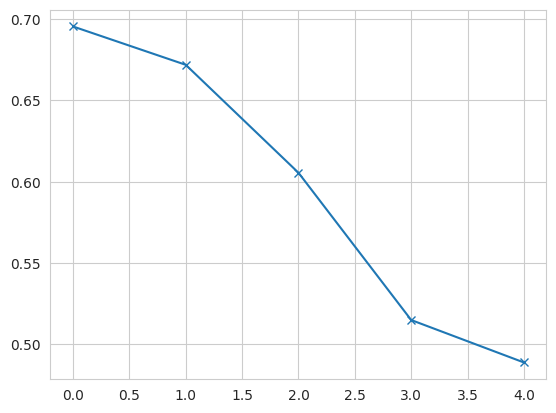

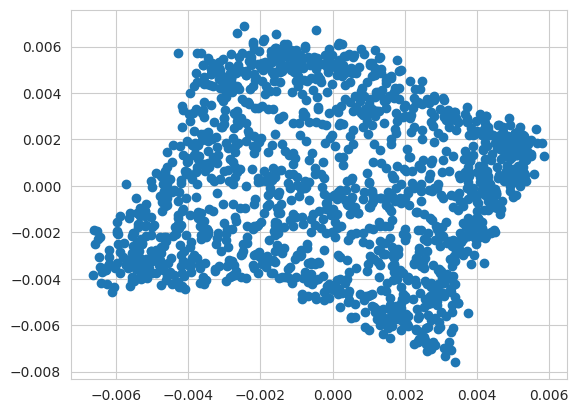

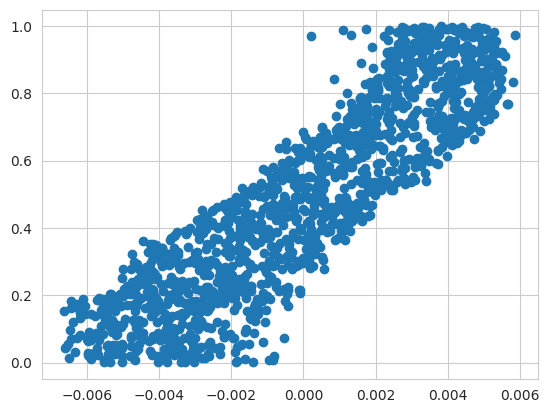

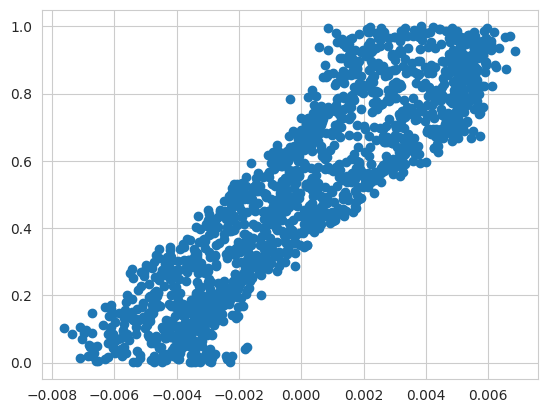

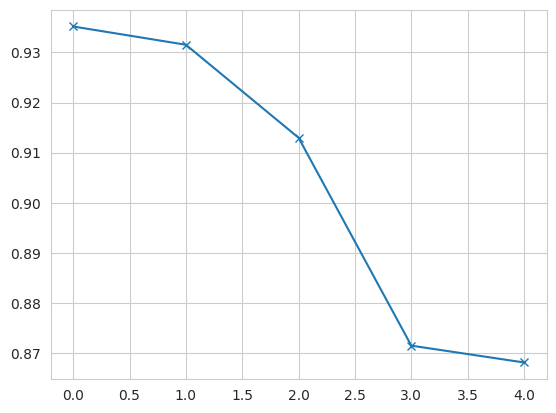

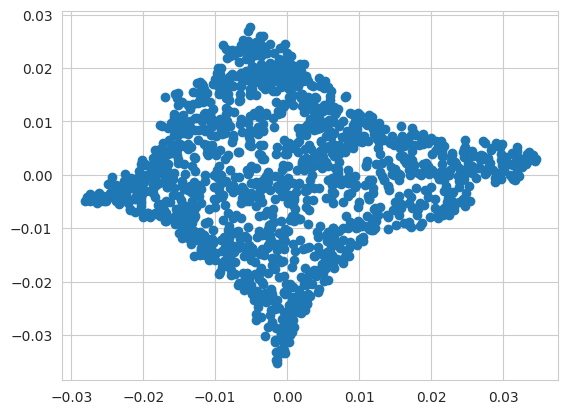

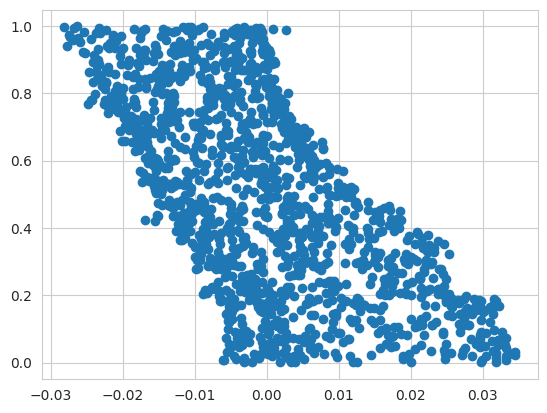

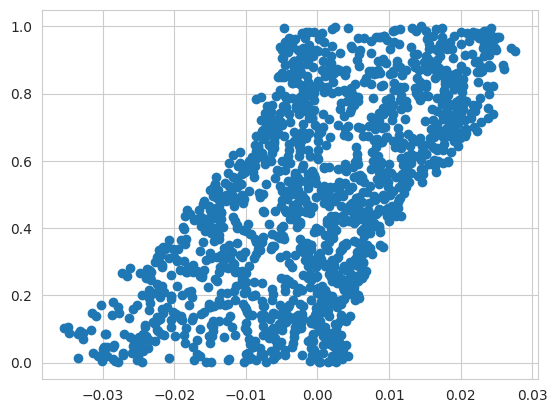

In [7]:
gnx = nk.nxadapter.nk2nx(g)

# A = nx.linalg.adjacency_matrix(gnx).todense()
A = nx.linalg.adjacency_matrix(gnx)

D = np.array([x[1] for x in (gnx.degree)])
D_h = D**(0.5)
D_hi = D**(-0.5)

n = A.shape[0]

# M_ij = W_ij / d_i
M = np.diag(1/D) @ A

Iweighting=0.5
# M = (1-Iweighting)* M + Iweighting * np.eye(M.shape[0])

S = np.diag(D_h) @ M @ np.diag(D_hi)
w, V = np.linalg.eigh(S)

Phi = np.diag(D_hi) @ V
Psi = np.diag(D_h) @ V

def diff_map(i, t):
    return Phi[i, -2::-1] * w[-1:]**t

_ = plt.figure()
plt.plot(w[-2:-7:-1], marker='x')

_ = plt.figure()
pts_diffmap = np.array([diff_map(i, 10) for i in range(n)])
_ = plt.scatter(pts_diffmap[:, 0], pts_diffmap[:, 1])
_ = plt.figure()
plt.scatter(pts_diffmap[:, 0], pts[:, 1])
_ = plt.figure()
plt.scatter(pts_diffmap[:, 1], pts[:, 0])

np.corrcoef(pts_diffmap[:, 0], pts[:, 1])
np.corrcoef(pts_diffmap[:, 1], pts[:, 0])

# gamma = 1.0
# M_tilde = np.diag(1/D) @ A @ np.diag(D**(-gamma))
# M_tilde = np.diag(1/M_tilde.sum(axis=-1)) @ M_tilde
# M_tilde = (1-Iweighting)* M_tilde + Iweighting * np.eye(M_tilde.shape[0])
# a, B = np.linalg.eig(M_tilde)
# B_inv = np.linalg.inv(B)
#

gamma=0.9

A = nx.linalg.adjacency_matrix(gnx)
gamma=0.9
M_tilde = scipy.sparse.diags(1/D) @ A @ scipy.sparse.diags(D**(-gamma))
M_tilde = scipy.sparse.diags(np.array(1/M_tilde.sum(axis=-1)).squeeze()) @ M_tilde
M_tilde = (1-Iweighting)* M_tilde + Iweighting * np.eye(M_tilde.shape[0])
a, B = scipy.sparse.linalg.eigs(M_tilde, k=10, which="LR")

idx = np.argsort(a)[::-1]
a = a[idx]
B = B[:, idx]

def diff_map2(i, t):
    return B[i, 1:] * a[1:]**t

_ = plt.figure()
plt.plot(a[1:6], marker='x')


_ = plt.figure()
pts_diffmap2 = np.array([diff_map2(i, 10) for i in range(n)])
_ = plt.scatter(pts_diffmap2[:, 0], pts_diffmap2[:, 1])

_ = plt.figure()
plt.scatter(pts_diffmap2[:, 0], pts[:, 1])
_ = plt.figure()
plt.scatter(pts_diffmap2[:, 1], pts[:, 0])

np.corrcoef(pts_diffmap2[:, 0], pts[:, 1])
np.corrcoef(pts_diffmap2[:, 1], pts[:, 0])

In [142]:
np.argsort(-a)

array([0, 1, 2, 4, 3, 5, 6, 7, 8, 9])

array([[ 1.        , -0.05954766],
       [-0.05954766,  1.        ]])

array([[1.        , 0.04426697],
       [0.04426697, 1.        ]])

array([[1.      , 0.333314],
       [0.333314, 1.      ]])

array([[1.        , 0.02802014],
       [0.02802014, 1.        ]])

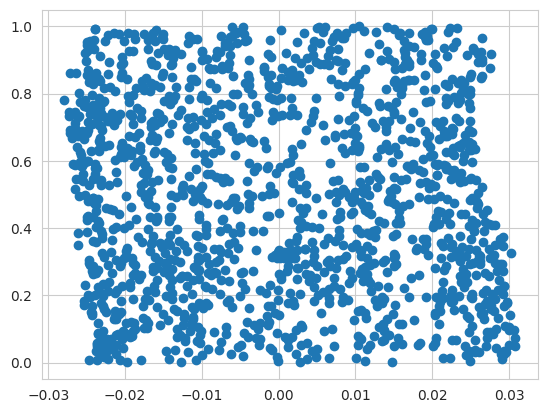

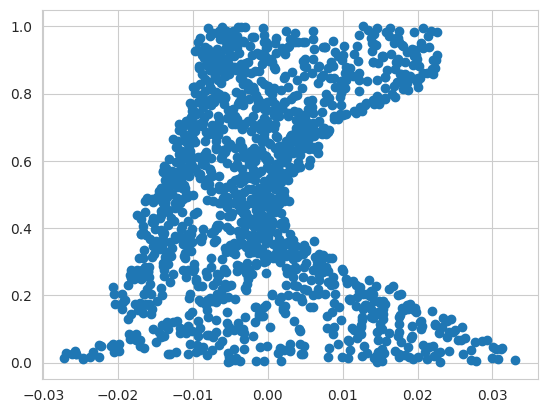

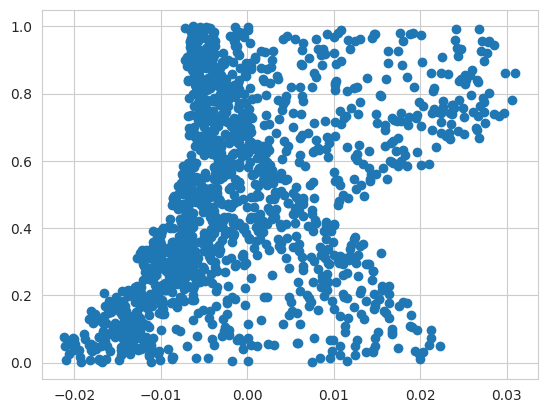

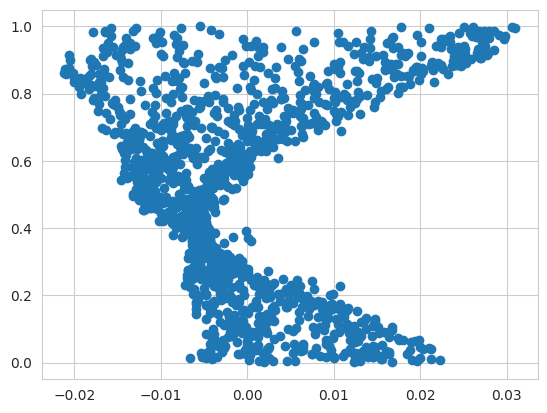

In [84]:
_ = plt.figure()
plt.scatter(pts_diffmap2[:, 0], pts[:, 0])
_ = plt.figure()
plt.scatter(pts_diffmap2[:, 1], pts[:, 1])

np.corrcoef(pts_diffmap2[:, 0], pts[:, 0])
np.corrcoef(pts_diffmap2[:, 1], pts[:, 1])

_ = plt.figure()
plt.scatter(pts_diffmap2[:, 2], pts[:, 0])
_ = plt.figure()
plt.scatter(pts_diffmap2[:, 2], pts[:, 1])

np.corrcoef(pts_diffmap2[:, 2], pts[:, 0])
np.corrcoef(pts_diffmap2[:, 2], pts[:, 1])

array([[ 1.        , -0.07859664],
       [-0.07859664,  1.        ]])

array([[1.        , 0.03802925],
       [0.03802925, 1.        ]])

array([[1.        , 0.79527583],
       [0.79527583, 1.        ]])

array([[ 1.        , -0.02520212],
       [-0.02520212,  1.        ]])

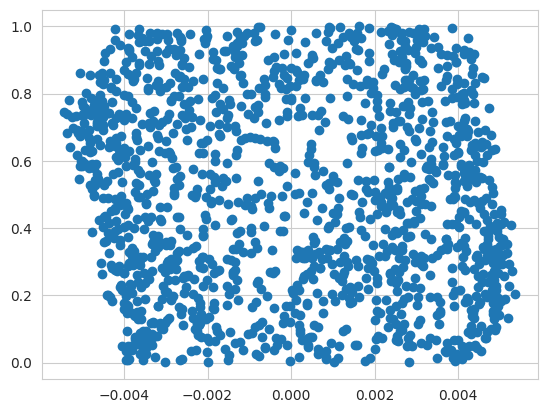

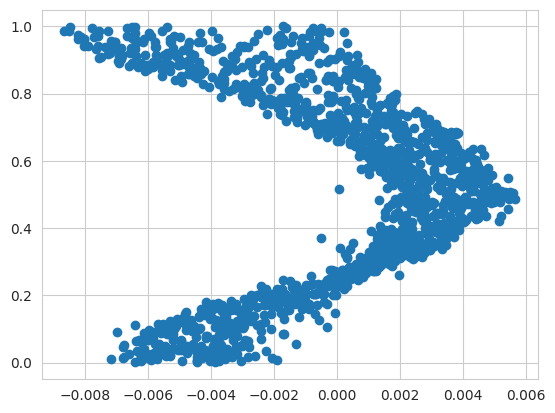

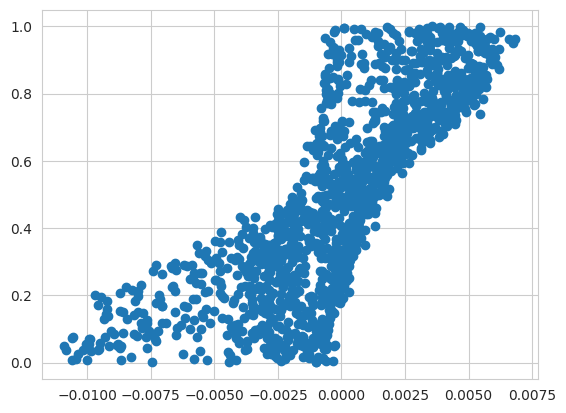

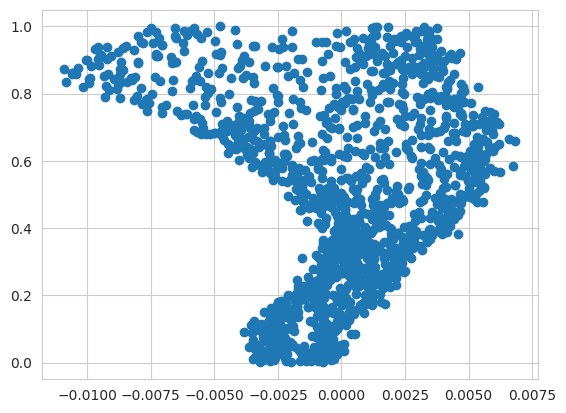

In [85]:
_ = plt.figure()
plt.scatter(pts_diffmap[:, 0], pts[:, 0])
_ = plt.figure()
plt.scatter(pts_diffmap[:, 1], pts[:, 1])

np.corrcoef(pts_diffmap[:, 0], pts[:, 0])
np.corrcoef(pts_diffmap[:, 1], pts[:, 1])

_ = plt.figure()
plt.scatter(pts_diffmap[:, 2], pts[:, 0])
_ = plt.figure()
plt.scatter(pts_diffmap[:, 2], pts[:, 1])

np.corrcoef(pts_diffmap[:, 2], pts[:, 0])
np.corrcoef(pts_diffmap[:, 2], pts[:, 1])

(array([16., 21., 26., 57., 94., 89., 92., 53., 40., 12.]),
 array([-0.01592703, -0.01296302, -0.00999902, -0.00703502, -0.00407101,
        -0.00110701,  0.00185699,  0.004821  ,  0.007785  ,  0.010749  ,
         0.01371301]),
 <BarContainer object of 10 artists>)

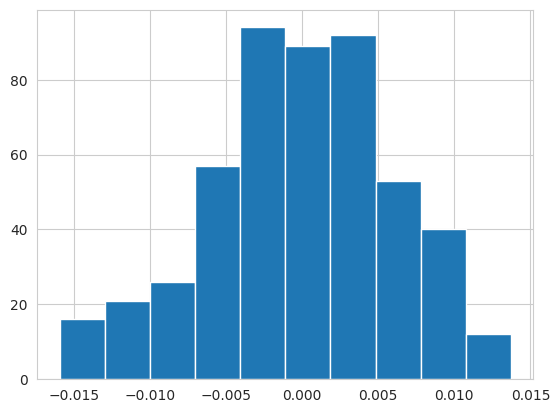

In [54]:
plt.hist(pts_diffmap[:, 1])

(array([15., 21., 33., 82., 69., 77., 87., 71., 36.,  9.]),
 array([-0.00391815, -0.00318555, -0.00245295, -0.00172035, -0.00098776,
        -0.00025516,  0.00047744,  0.00121004,  0.00194263,  0.00267523,
         0.00340783]),
 <BarContainer object of 10 artists>)

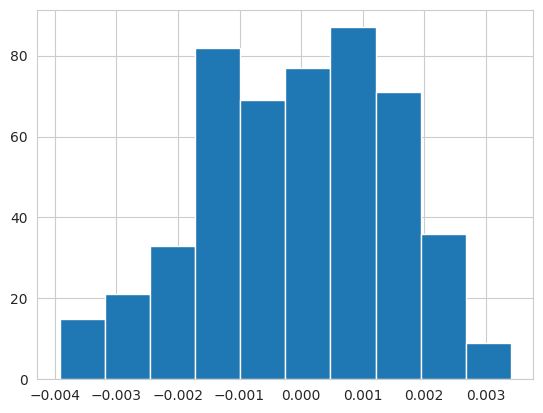

In [55]:
plt.hist(pts_diffmap2[:, 1])

(array([15., 85., 61., 54., 41., 33., 37., 55., 79., 40.]),
 array([-0.00979085, -0.00779603, -0.0058012 , -0.00380638, -0.00181155,
         0.00018327,  0.00217809,  0.00417292,  0.00616774,  0.00816257,
         0.01015739]),
 <BarContainer object of 10 artists>)

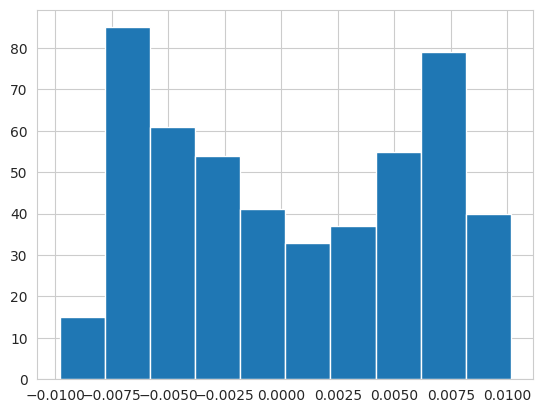

In [57]:
plt.hist(pts_diffmap[:, 0])

In [95]:
np.linspace(-1.4, 1.4, 29)

array([-1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4,
       -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,
        0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4])

In [103]:
for gamma in [0.0, 0.2] + list(np.linspace(0.7, 1.3, 10)):
    M_tilde = np.diag(1/D) @ A @ np.diag(D**(-gamma))
    M_tilde = np.diag(1/M_tilde.sum(axis=-1)) @ M_tilde
    M_tilde = (1-Iweighting)* M_tilde + Iweighting * np.eye(M_tilde.shape[0])
    a, B = np.linalg.eig(M_tilde)
    B_inv = np.linalg.inv(B)

    def diff_map2(i, t):
        return B[i, 1:] * a[1:]**t

    pts_diffmap2 = np.array([diff_map2(i, 10) for i in range(n)])

    print(f'gamma={gamma}')
    print(a[1:6])
    np.corrcoef(pts_diffmap2[:, 0], pts[:, 1])[0, 1]
    np.corrcoef(pts_diffmap2[:, 1], pts[:, 0])[0, 1]

    # _ = plt.figure()
    # plt.plot(a[1:6], marker='x')
    #
    #
    # _ = plt.figure()
    # pts_diffmap2 = np.array([diff_map2(i, 10) for i in range(n)])
    # _ = plt.scatter(pts_diffmap2[:, 0], pts_diffmap2[:, 1])
    #
    # _ = plt.figure()
    # plt.scatter(pts_diffmap2[:, 0], pts[:, 1])
    # _ = plt.figure()
    # plt.scatter(pts_diffmap2[:, 1], pts[:, 0])
    #
    # np.corrcoef(pts_diffmap2[:, 0], pts[:, 1])
    # np.corrcoef(pts_diffmap2[:, 1], pts[:, 0])

gamma=0.0
[0.8824491  0.80055851 0.79085245 0.76903135 0.7606767 ]


0.9855795913914832

0.21575890227433556

gamma=0.2
[0.90631323 0.83202274 0.82469868 0.80579046 0.79563525]


0.9882678407653201

0.22715932048998175

gamma=0.7
[0.94670322 0.8901209  0.88850406 0.87992423 0.86060972]


-0.9912890651869726

-0.3525559401045351

gamma=0.7666666666666666
[0.95031863 0.89580919 0.89481052 0.88714428 0.86709188]


-0.9914389535458765

-0.4170815979837444

gamma=0.8333333333333333
[0.95360613 0.90113097 0.90068842 0.89371001 0.87313805]


0.991552250744187

-0.5826458286512931

gamma=0.9
[0.95659503 0.90633279 0.90597691 0.89963248 0.8787773 ]


-0.9916337201433048

-0.9048644687798588

gamma=0.9666666666666667
[0.95931368 0.91151096 0.91065468 0.90493766 0.88403911]


-0.991687222983188

0.8666594303688806

gamma=1.0333333333333332
[0.96178896 0.91642025 0.91502129 0.90967301 0.88895278]


0.9917158026357191

0.8346570564066343

gamma=1.1
[0.96404607 0.9210482  0.9191228  0.91390491 0.8935469 ]


0.9917217752967816

0.8074191103962687

gamma=1.1666666666666667
[0.96610831 0.92539789 0.92297892 0.91770678 0.89784899]


-0.9917068197751743

0.7826231550263221

gamma=1.2333333333333334
[0.96799703 0.92947523 0.92660631 0.9211471  0.90188515]


-0.9916720619317867

-0.7602550706620176

gamma=1.3
[0.96973156 0.93329019 0.93002214 0.92428371 0.90567989]


0.991618151542737

-0.7403869553796644

In [104]:
gamma=0.9

for Iweighting in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    M_tilde = np.diag(1/D) @ A @ np.diag(D**(-gamma))
    M_tilde = np.diag(1/M_tilde.sum(axis=-1)) @ M_tilde
    M_tilde = (1-Iweighting)* M_tilde + Iweighting * np.eye(M_tilde.shape[0])
    a, B = np.linalg.eig(M_tilde)
    B_inv = np.linalg.inv(B)

    def diff_map2(i, t):
        return B[i, 1:] * a[1:]**t

    pts_diffmap2 = np.array([diff_map2(i, 10) for i in range(n)])

    print(f'Iweighting={Iweighting}')
    print(a[1:6])
    np.corrcoef(pts_diffmap2[:, 0], pts[:, 1])[0, 1]
    np.corrcoef(pts_diffmap2[:, 1], pts[:, 0])[0, 1]

    # _ = plt.figure()
    # plt.plot(a[1:6], marker='x')
    #
    #
    # _ = plt.figure()
    # pts_diffmap2 = np.array([diff_map2(i, 10) for i in range(n)])
    # _ = plt.scatter(pts_diffmap2[:, 0], pts_diffmap2[:, 1])
    #
    # _ = plt.figure()
    # plt.scatter(pts_diffmap2[:, 0], pts[:, 1])
    # _ = plt.figure()
    # plt.scatter(pts_diffmap2[:, 1], pts[:, 0])
    #
    # np.corrcoef(pts_diffmap2[:, 0], pts[:, 1])
    # np.corrcoef(pts_diffmap2[:, 1], pts[:, 0])

Iweighting=0.1
[0.92187106 0.83139902 0.83075844 0.81933847 0.78179914]


-0.9916337201433051

0.9048644687800276

Iweighting=0.2
[0.93055206 0.85013246 0.84956306 0.83941197 0.80604368]


-0.9916337201433053

0.9048644687799087

Iweighting=0.3
[0.93923305 0.86886591 0.86836768 0.85948548 0.83028822]


0.9916337201433049

0.9048644687799269

Iweighting=0.4
[0.94791404 0.88759935 0.88717229 0.87955898 0.85453276]


0.9916337201433053

0.9048644687799214

Iweighting=0.5
[0.95659503 0.90633279 0.90597691 0.89963248 0.8787773 ]


-0.9916337201433048

-0.9048644687798588

Iweighting=0.6
[0.96527603 0.92506623 0.92478153 0.91970599 0.90302184]


0.9916337201433053

-0.9048644687799736

Iweighting=0.7
[0.97395702 0.94379967 0.94358615 0.93977949 0.92726638]


-0.9916337201433051

-0.9048644687798547

In [91]:
import os
os.getcwd()
os.environ['DATA_PATH'] = '../../FE_FB_copyweights_cube/'

df = pd.read_csv(os.environ['DATA_PATH'] + '2-features/results.csv')

df.Info = df.Info.apply(lambda temp: {key: eval(var) for key, var in [x.split('=') for x in temp.split('|')]} if (type(temp) is str and '|' in temp) else {
    })
df['alpha'] = df.Info.apply(lambda x: x['alpha'] if 'alpha' in x else 1/float(x['t']) if 't' in x else None)

'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [93]:
df.loc[:, ['Graph', 'Model', 'Nodes', 'Info']]

,Graph,Model,Nodes,Info
0,socfb-Caltech36,1d-copyweight-cube-girg,756,"{'tau': 7.3017225936374555, 'alpha': 1.2171928..."
1,socfb-Reed98,1d-copyweight-cube-girg,955,"{'tau': 4.381732472502371, 'alpha': 1.07671601..."
2,socfb-Caltech36,2d-copyweight-cube-girg,757,"{'tau': 7.3017225936374555, 'alpha': 1.1949215..."
3,socfb-Simmons81,1d-copyweight-cube-girg,1497,"{'tau': 4.739342146243066, 'alpha': 1.16300199..."
4,socfb-Haverford76,1d-copyweight-cube-girg,1440,"{'tau': 6.5461700448727616, 'alpha': 1.0592519..."
...,...,...,...,...
144,socfb-Maine59,1d-copyweight-cube-girg,9048,"{'tau': 5.253031117549527, 'alpha': 1.10401932..."
145,socfb-Georgetown15,1d-copyweight-cube-girg,9373,"{'tau': 4.898184083615165, 'alpha': 1.05925190..."
146,socfb-Brown11,3d-copyweight-cube-girg,8551,"{'tau': 4.849298412653411, 'alpha': 1.01010101..."
147,socfb-UCSC68,2d-copyweight-cube-girg,8895,"{'tau': 5.1110598266440075, 'alpha': 1.1181969..."


In [94]:
df.iloc[1].Info

{'tau': 4.381732472502371,
 'alpha': 1.0767160161507403,
 'const': 0.11990006024738019,
 'target_lcc': 0.31836022727227925,
 'fit_lcc': 0.3122201463706791,
 'fitting_time': 19.216066598892212,
 'hist': [(2.0, 0.601654218661161),
  (1.342281879194631, 0.4500069992020386),
  (1.1527377521613833, 0.34883587407667926),
  (1.0767160161507403, 0.3162678611423067),
  (1.1134307585247043, 0.3359806839067379),
  (1.0947656517276771, 0.32100278073945815),
  (1.0856658184902461, 0.33016551433112173),
  (1.0767160161507403, 0.3162678611423067)]}

In [8]:
np.max(Phi @ np.diag(w) @ Psi.T - M)

3.2959746043559335e-16

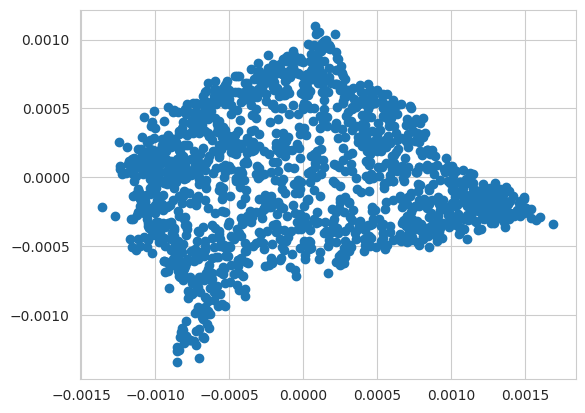

In [24]:
a, B = np.linalg.eig(M)
B_inv = np.linalg.inv(B)

def diff_map2(i, t):
    return B[i, 1:] * a[1:]**t

pts_diffmap2 = np.array([diff_map2(i, 10) for i in range(n)])
plt.scatter(pts_diffmap2[:, 0], pts_diffmap2[:, 1])

In [13]:
np.min(B @ np.diag(a) @ B_inv - M)

-4.141489668568754e-15

In [18]:
a[::-1]
w
':)'

array([-2.92586343e-03,  1.32571621e-04,  3.80516403e-03, ...,
        6.68927775e-01,  6.99564409e-01,  1.00000000e+00])

array([-0.27466137, -0.20270637, -0.19562168, ...,  0.66892777,
        0.69956441,  1.        ])

':)'

In [19]:
np.linalg.norm(B[:, 0])

1.0000000000000002

In [20]:
np.linalg.norm(Phi[:, 0])

0.10854919496771288

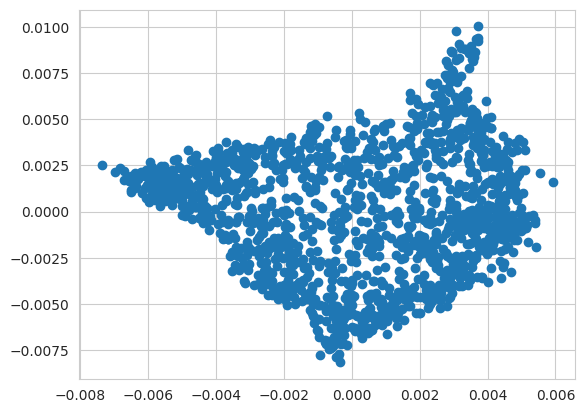

In [23]:
pts_diffmap = np.array([diff_map(i, 10) for i in range(n)])
plt.scatter(pts_diffmap[:, 0], pts_diffmap[:, 1])